In [1]:
import pandas as pd
import numpy as np
import os
import os.path
from PIL import Image

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('../../../data/iWildCam/train.csv')

In [3]:
classes = """empty, 0
deer, 1
moose, 2
squirrel, 3
rodent, 4
small_mammal, 5
elk, 6
pronghorn_antelope, 7
rabbit, 8
bighorn_sheep, 9
fox, 10
coyote, 11
black_bear, 12
raccoon, 13
skunk, 14
wolf, 15
bobcat, 16
cat, 17
dog, 18
opossum, 19
bison, 20
mountain_goat, 21
mountain_lion, 22""".split('\n')
classes = {int(i.split(', ')[1]): i.split(', ')[0] for i in classes}

In [4]:
train_df['classes'] = train_df['category_id'].apply(lambda x: classes[x])
train_df['classes'].value_counts()

empty            131457
opossum           14106
raccoon            8623
coyote             7209
rabbit             6938
deer               6102
bobcat             5975
cat                4759
squirrel           3398
dog                3035
rodent             2210
skunk              1361
fox                1093
mountain_lion        33
Name: classes, dtype: int64

In [5]:
test = train_df.loc[(train_df['classes'].isin(['coyote', 'raccoon'])) & (train_df['location'].isin([130]))]
test.head()

,category_id,date_captured,file_name,frame_num,id,location,rights_holder,seq_id,seq_num_frames,width,height,classes
50,11,2011-12-22 23:26:49,58ff0fe6-23d2-11e8-a6a3-ec086b02610b.jpg,2,58ff0fe6-23d2-11e8-a6a3-ec086b02610b,130,Justin Brown,6f0d3461-5567-11e8-86be-dca9047ef277,3,1024,747,coyote
90,13,2011-11-27 23:09:22,593a5093-23d2-11e8-a6a3-ec086b02610b.jpg,1,593a5093-23d2-11e8-a6a3-ec086b02610b,130,Justin Brown,6f0d2261-5567-11e8-942a-dca9047ef277,3,1024,747,raccoon
513,11,2012-01-19 11:49:35,58ede1d1-23d2-11e8-a6a3-ec086b02610b.jpg,3,58ede1d1-23d2-11e8-a6a3-ec086b02610b,130,Justin Brown,6f0d484c-5567-11e8-89bb-dca9047ef277,3,1024,747,coyote
555,13,2011-10-04 05:14:45,58b6653b-23d2-11e8-a6a3-ec086b02610b.jpg,3,58b6653b-23d2-11e8-a6a3-ec086b02610b,130,Justin Brown,6f0d0582-5567-11e8-996b-dca9047ef277,3,1024,747,raccoon
994,13,2012-04-11 04:17:31,58d161cd-23d2-11e8-a6a3-ec086b02610b.jpg,1,58d161cd-23d2-11e8-a6a3-ec086b02610b,130,Justin Brown,6f0d6f7a-5567-11e8-99e1-dca9047ef277,3,1024,747,raccoon


58b9d6fd-23d2-11e8-a6a3-ec086b02610b.jpg
590ebda0-23d2-11e8-a6a3-ec086b02610b.jpg
58ac0cab-23d2-11e8-a6a3-ec086b02610b.jpg
585a629b-23d2-11e8-a6a3-ec086b02610b.jpg
591366ac-23d2-11e8-a6a3-ec086b02610b.jpg
5879d2b6-23d2-11e8-a6a3-ec086b02610b.jpg
588dbbcc-23d2-11e8-a6a3-ec086b02610b.jpg
58bea6c9-23d2-11e8-a6a3-ec086b02610b.jpg


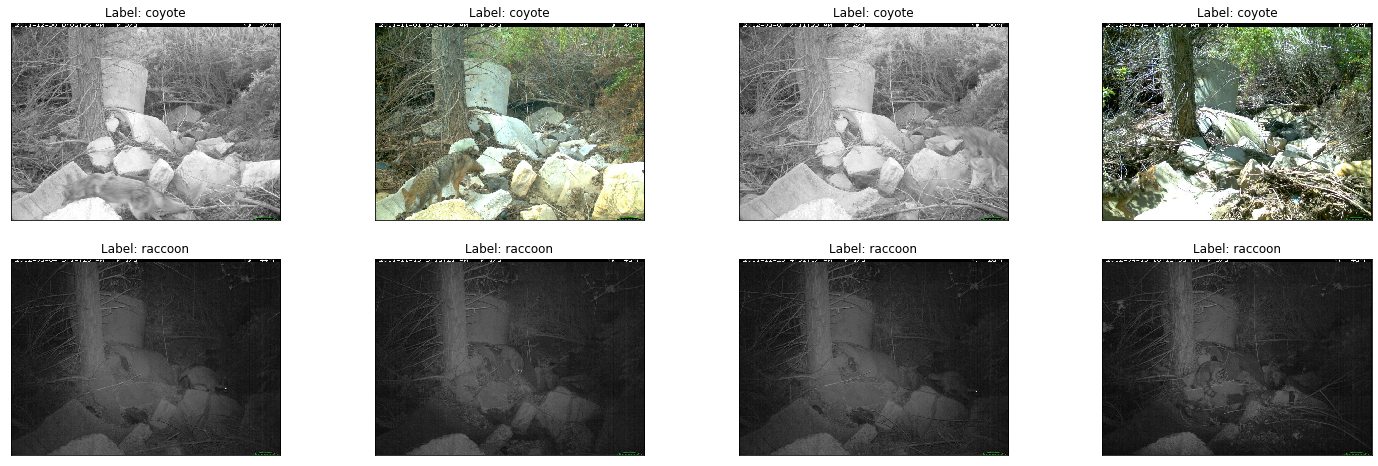

In [6]:
fig = plt.figure(figsize=(25, 60))
imgs = [np.random.choice(test.loc[test['classes'] == i, 'file_name'], 4) for i in test.classes.unique()]
imgs = [i for j in imgs for i in j]
labels = [[i] * 4 for i in test.classes.unique()]
labels = [i for j in labels for i in j]
for idx, img in enumerate(imgs):
    ax = fig.add_subplot(14, 4, idx + 1, xticks=[], yticks=[])
    print(img)
    im = Image.open("../../../data/iWildCam/train/" + img)
    plt.imshow(im)
    ax.set_title(f'Label: {labels[idx]}')

In [1]:
def pretty_print(*values):
        col_width = 13
        def format_val(v):
            if not isinstance(v, str):
                v = np.array2string(v, precision=5, floatmode='fixed')
            return v.ljust(col_width)
        str_values = [format_val(v) for v in values]
        print("   ".join(str_values))

In [2]:
pretty_print("hi", "there")

hi              there        


In [3]:
pretty_print('step', 'train nll', 'train acc', 'train penalty', 'test acc')

step            train nll       train acc       train penalty   test acc     


In [9]:
from datetime import datetime
start = datetime.now().time()
FMT = '%H:%M:%S'
start = start.strftime(FMT)
start

'12:28:05'

In [11]:
end = datetime.now().time()
end = end.strftime(FMT)
end

'12:28:24'

In [8]:
e = datetime.strptime(end, FMT) - datetime.strptime(start, FMT)

str